In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np

import EmissionsFitting as EmF

C:\Users\luker\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Compounds = ['C2H2', 'C2H4', 'C2H6', 'CH3Cl', 'CH4', 'ClONO2', 'ClO', 'CO2', 'COF2', 'CO', 'H2CO', 'H2O2', 'H2O', 'H2S', 'HBr', 'HCl', 'HCN', 'HCOOH', 'HF', 'HI', 'HNO3', 'HO2', 'HOCl', 'N2O', 'N2', 'NH3', 'NO+', 'NO2', 'NO', 'O2', 'O3', 'OCS', 'OH', 'PH3', 'SF6', 'SO2']

# For the sake of argument, References = A^T.
References = EmF.getAbsorptionFeatures(Compounds)


# H2S seems to be problematic. Remove it here.
del References[13]
del Compounds[13]

In [3]:
# Directs to a folder which contains ~500 time steps of a burn.

Path = 'spectra/test_series/'

onlyfiles = [f for f in listdir(Path) if isfile(join(Path, f))]

In [11]:
# Very simple thing to generate an average spectrum (here from the first 5 spectra) to use as a base.

Wavenumber_base, Spectrum_base = [], []

N = 150

for i in range(N):
    filename = Path + onlyfiles[i]
    f, s = EmF.getEmissionsSpectra(filename)
    f, s = f[800:], s[800:]
    Wavenumber_base.append(f)
    Spectrum_base.append(s)
    
Wave_b = np.average(Wavenumber_base,axis=0)
Spec_b = np.average(Spectrum_base,axis=0)

In [15]:
Wave_avg = np.average(Wavenumber_base, axis=0)
Spec_avg = np.average(Spectrum_base,axis=0)
Wave_std = np.std(Wavenumber_base, axis=0)
Wave_sterr = Wave_std/np.sqrt(N)


In [7]:
"""
This wavenumber Range appropriate for CO2. I have a list of species and their corresponding
ranges in EmissionsFitting.py, but this is fine for now
"""
Range =  [0,10000]

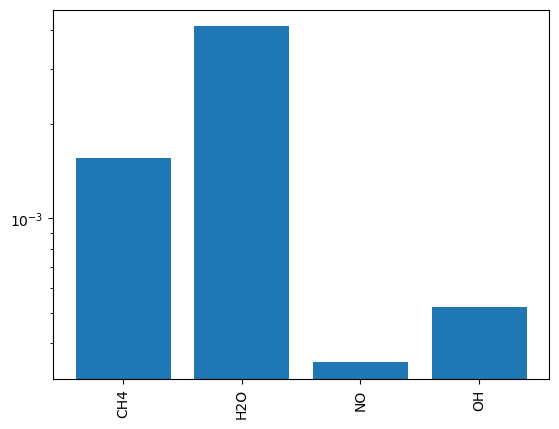

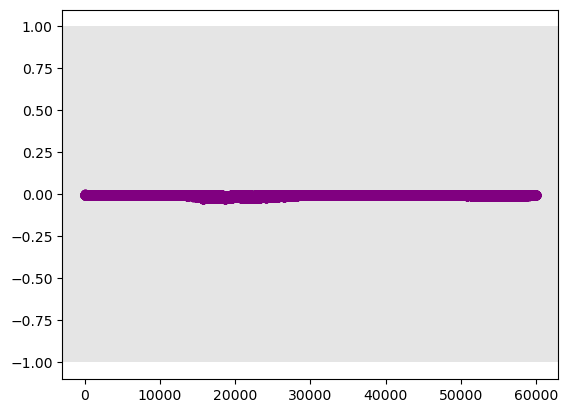

KeyboardInterrupt: 

In [8]:
"""
reduce_fit. If True, it will only feed system the data for CO2, CO, CH4, and H2O.
"""
reduce_fit = False
smooth = True
plot = True

for x in onlyfiles:
    EmF.fit_spectra(Path+x, Range, [Wave_b, Spec_b], References, reduce_fit, smooth, plot)